# Individualized Progress Tracking

This notebook is part of BCA / Sem 5 / Machine Learning / Project / Individualized Progress Tracking

#### Objective
 
Develop a tool that allows users to track their progress in various learning modules. Include visualizations and statistics to help users understand their strengths and areas that need improvement.

Dataset : https://www.statlect.com/datasets/SimpleR-Pre-loaded-Student-performance.csv

### Setting up the environment

```bash
# after creating a virtual environment and activating it
pip install -r requirements.txt
# also rename dataset to StudentPerformance.csv
mv SimpleR-Pre-loaded-Student-performance.csv StudentPerformance.csv
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(df.shape)
df.info()

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### We saw a memory usage of 62 KB, which is not bad. But we can do better. 

- Scores can be represented in int16

- race/ethnicity are within 5 categories (`'group A', 'group B', 'group C', 'group D', 'group E'`), so we can use category instead of object

- parental level of education are within 6 categories (`["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school']`), so we can use category instead of object

- lunch are within 2 categories (`['standard', 'free/reduced']`), so we can use category instead of object there too.


In [5]:
df['math score'] = df['math score'].astype(np.int16)
df['reading score'] = df['reading score'].astype(np.int16)
df['writing score'] = df['writing score'].astype(np.int16)
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].replace({'F': 'female', 'M': 'male'})
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['parental level of education'] = df['parental level of education'].astype('category')
df['lunch'] = df['lunch'].astype('category')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int16   
 6   reading score                1000 non-null   int16   
 7   writing score                1000 non-null   int16   
dtypes: category(4), int16(3), object(1)
memory usage: 18.4+ KB


##### Now we are using just a little over 15 KB of memory, which is a **75% reduction** in memory usage 

**Lets look for missing values now**

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

> No missing values, which is great!

# Preparing the data

- passing marks = 33%
- grading system
```
{
    [[95, 100], O, Outstanding],
    [[80, 95), A, Excellent],
    [[65, 80), B, Good],
    [[50, 65), C, Substantial],
    [[33, 50), D, Marginal],
    [[0, 33), F, Fail]
}
```

In [8]:
passmark = 33
df['Math_PassStatus'] = np.where(df['math score']< passmark, 'F', 'P')
df['Reading_PassStatus'] = np.where(df['reading score']< passmark, 'F', 'P')
df['Writing_PassStatus'] = np.where(df['writing score']< passmark, 'F', 'P')
# pass overall 
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis=1)


print(df['math score'][0]>50)
df['Percentage'] = (df['math score'] + df['reading score'] + df['writing score'])/3

def GetGrade(Percentage, Math_PassStatus, Reading_PassStatus, Writing_PassStatus):  
    if(Percentage >= 95): return 'O'
    if(Percentage >= 80): return 'A'
    if(Percentage >= 65): return 'B'
    if(Percentage >= 50): return 'C'
    if(Percentage >= 33): return 'D'
    else: return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['Math_PassStatus'], x['Reading_PassStatus'], x['Writing_PassStatus']), axis=1)

df['Remarks'] = df.apply(lambda x : 'Outstanding' if x['Grade'] == 'O' else ('Excellent' if x['Grade'] == 'A' else ('Good' if x['Grade'] == 'B' else ('Substantial' if x['Grade'] == 'C' else ('Marginal' if x['Grade'] == 'D' else 'Fail')))), axis=1)

df.head()

True


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Percentage,Grade,Remarks
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72.666667,B,Good
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82.333333,A,Excellent
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,92.666667,A,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,49.333333,D,Marginal
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,76.333333,B,Good


#### Progress of individual student 

- show progress of individual student
- progress in comparison to other students
- progress in comparison to other students in the same grade


##### show progress of individual student

- Display show info such as pass/fail, grade, percentage
- Bar char to show strong and weak subject
- strong colored green, weak colored red, orange for average

lunch                         standard
test preparation course           none
math score                          71
reading score                       49
writing score                       52
Math_PassStatus                      P
Reading_PassStatus                   P
Writing_PassStatus                   P
OverAll_PassStatus                   P
Percentage                   57.333333
Grade                                C
Remarks                    Substantial
Name: 520, dtype: object


/tmp/ipykernel_167487/3645548472.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(subjects, scores, color=[GetColor(scores[0]), GetColor(scores[1]), GetColor(scores[2])])


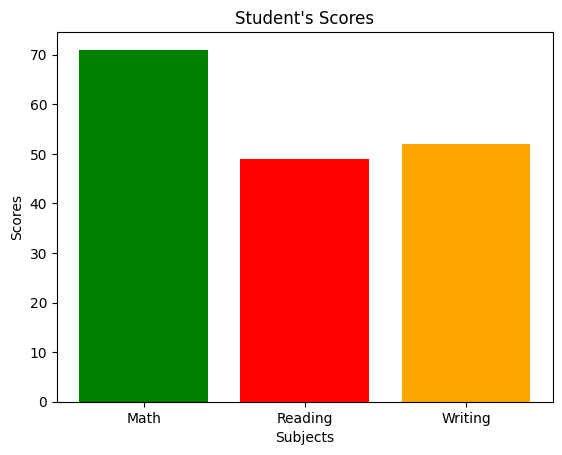

In [9]:
student_id = 520
print(df.iloc[student_id][3:])

scores = df.iloc[student_id][['math score', 'reading score', 'writing score']]
subjects = ['Math', 'Reading', 'Writing']

def GetColor(score):
    if(score >=65): 
        return 'green'
    elif (score >=50):
        return 'orange'
    else:
        return 'red'

plt.bar(subjects, scores, color=[GetColor(scores[0]), GetColor(scores[1]), GetColor(scores[2])])
plt.xlabel("Subjects")
plt.ylabel("Scores")
plt.title("Student's Scores")
plt.show()

#### progress in comparison to other students

- Highest and lowest marks in the grade
- Average marks in the grade

Highest Scores in the same grade as you :
math score       74
reading score    73
writing score    73
dtype: int16
Lowest Scores in the same grade as you :
math score       35
reading score    44
writing score    43
dtype: int16
Average Scores in the same grade as you :
math score       56.540541
reading score    59.260135
writing score    57.817568
dtype: float64


/tmp/ipykernel_167487/2270616417.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(['Highest', 'Lowest', 'Average'], [highest_score[0], lowest_score[0], average_score[0]], color=['green', 'red', 'orange'])


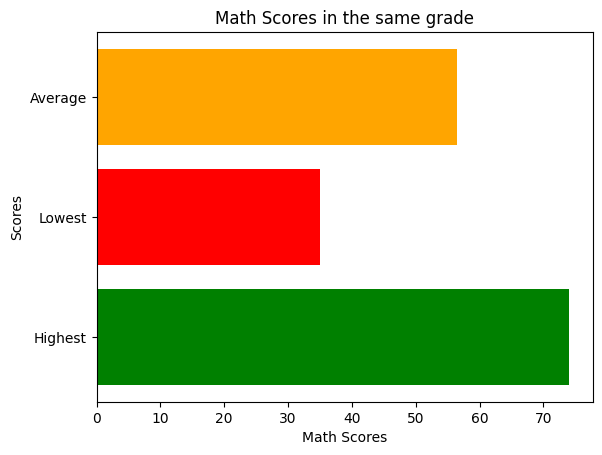

/tmp/ipykernel_167487/2270616417.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(['Highest', 'Lowest', 'Average'], [highest_score[1], lowest_score[1], average_score[1]], color=['green', 'red', 'orange'])


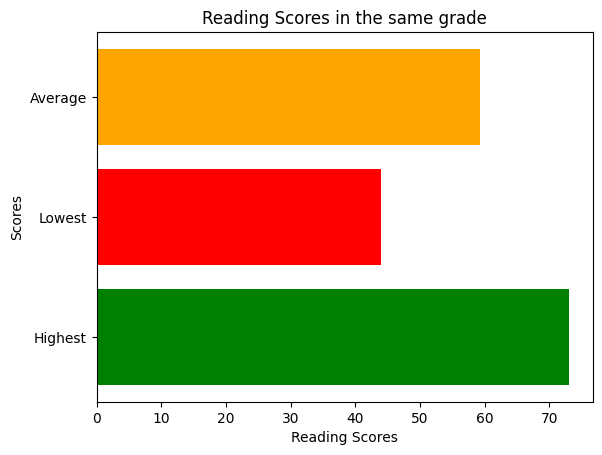

/tmp/ipykernel_167487/2270616417.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(['Highest', 'Lowest', 'Average'], [highest_score[2], lowest_score[2], average_score[2]], color=['green', 'red', 'orange'])


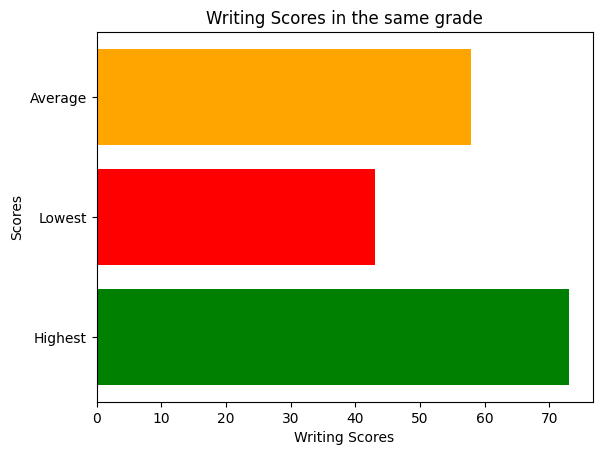

In [10]:
scores_same_grade = df[df['Grade'] == df.iloc[student_id]['Grade']][['math score', 'reading score', 'writing score']]

highest_score = scores_same_grade.max()
lowest_score = scores_same_grade.min()

print(f"Highest Scores in the same grade as you :\n{highest_score}")
print(f"Lowest Scores in the same grade as you :\n{lowest_score}")


average_score = scores_same_grade.mean()
print(f"Average Scores in the same grade as you :\n{average_score}")

plt.barh(['Highest', 'Lowest', 'Average'], [highest_score[0], lowest_score[0], average_score[0]], color=['green', 'red', 'orange'])
plt.xlabel("Math Scores")
plt.ylabel("Scores")
plt.title("Math Scores in the same grade")
plt.show()


plt.barh(['Highest', 'Lowest', 'Average'], [highest_score[1], lowest_score[1], average_score[1]], color=['green', 'red', 'orange'])
plt.xlabel("Reading Scores")
plt.ylabel("Scores")
plt.title("Reading Scores in the same grade")
plt.show()


plt.barh(['Highest', 'Lowest', 'Average'], [highest_score[2], lowest_score[2], average_score[2]], color=['green', 'red', 'orange'])
plt.xlabel("Writing Scores")
plt.ylabel("Scores")
plt.title("Writing Scores in the same grade")
plt.show()


#### Rooms for improvement

- Show the areas where the student is doing well
- Show the areas where the student needs to improve
- classmates who are doing well in the areas where the student needs to improve. Top 5 to ask for help



In [11]:
stu_data = df.iloc[student_id][3:]

marks = stu_data[['math score', 'reading score', 'writing score']]

doing_well = [i for i in marks.index if marks[i] >= 80]
needs_to_improve_a_lot = [i for i in marks.index if marks[i] < 50]
needs_to_improve_a_little = [i for i in marks.index if marks[i] >= 50 and marks[i] < 80]

if len(doing_well) == 0:
    print("You are not doing well in any subject")
else:
    print(f"You are doing well in {doing_well}")

if len(needs_to_improve_a_lot) != 0:
    print(f"You need to improve a lot in {needs_to_improve_a_lot}")

if len(needs_to_improve_a_little) != 0:
    print(f"You need to improve a little in {needs_to_improve_a_little}")


for subject in needs_to_improve_a_lot:
    classmates_doing_well = df[df[subject] >= 80]
    
    if len(classmates_doing_well) > 5:
        classmates_doing_well = classmates_doing_well.sample(5)
    
    print(f"Classmates to ask for help in {subject}:", classmates_doing_well.index.tolist())

for subject in needs_to_improve_a_little:
    classmates_doing_well = df[df[subject] >= 80]
    
    if len(classmates_doing_well) > 5:
        classmates_doing_well = classmates_doing_well.sample(5)
    
    print(f"Classmates to ask for help in {subject}:", classmates_doing_well.index.tolist())

print("Good Luck!")

You are not doing well in any subject
You need to improve a lot in ['reading score']
You need to improve a little in ['math score', 'writing score']
Classmates to ask for help in reading score: [426, 959, 443, 852, 903]
Classmates to ask for help in math score: [239, 713, 132, 546, 447]
Classmates to ask for help in writing score: [907, 214, 645, 962, 900]
Good Luck!
